In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
#KERAS
from keras.models  import Sequential, K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop
import warnings
#Evaluation of performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline



df = pd.read_csv('C:\\Users\\jamie\\AppData\\Desktop\\PhD\\Datasets\\MSc-Sleep-Data\\Subject1.csv')


df = df.drop('Date', 1)
df = df.drop('Gender', 1)
df.head(10)

In [3]:
#RANDOM FOREST

X = df.iloc[:, :-1].values

#y-axis uses the variable outcome as its target variable
y = df["Outcome"].values

#splitt the training data using 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11111)

#shows percentage of seizures compared to non seizures
np.mean(y), np.mean(1-y)


## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


#list the performance metrics the model emanates
print('\nAccuracy Score for Random Forest Model is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)*100))
print('\nRandom Forest roc-auc measure is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))
print("\nRandom Forest  Classification Report\n")
print(classification_report(y_test,y_pred_class_rf))


#NEURAL NETWORK
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

# 1 hidden layer, 12 hidden nodes, sigmoid activation
model_1 = Sequential([
    Dense(12, input_shape=(5,), activation="relu"),
    Dense(1, activation="sigmoid")
])

print("\n************Start of Nerual Netwrok Summary*********")
model_1.summary()

# Fit(Train) the Model
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

y_pred_class_nn_1[:10]
y_pred_prob_nn_1[:10]

# Print model performance and plot the roc curve
print('\n')
print('\nAccuracy Score for Nerual Network is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)*100))
print('\nNerual Network roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_class_nn_1)))
print("\nNerual Network Classification Report\n")
print(classification_report(y_test,y_pred_class_nn_1))




W0811 19:13:10.647652 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 19:13:10.674720 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 19:13:10.680817 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 19:13:10.727532 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0811 19:13:10.733515 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anac


Accuracy Score for Random Forest Model is 98.889

Random Forest roc-auc measure is 0.989

Random Forest  Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.50      1.00      0.67         1

    accuracy                           0.99        90
   macro avg       0.75      0.99      0.83        90
weighted avg       0.99      0.99      0.99        90


************Start of Nerual Netwrok Summary*********
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


W0811 19:13:10.909983 44048 deprecation_wrapper.py:119] From C:\Users\jamie\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 210 samples, validate on 90 samples
Epoch 1/200
210/210 [==============================] - 0s 1ms/step - loss: 0.5663 - acc: 0.7952 - val_loss: 0.5695 - val_acc: 0.7667
Epoch 2/200
210/210 [==============================] - 0s 38us/step - loss: 0.5594 - acc: 0.8000 - val_loss: 0.5617 - val_acc: 0.7778
Epoch 3/200
210/210 [==============================] - 0s 35us/step - loss: 0.5527 - acc: 0.8143 - val_loss: 0.5539 - val_acc: 0.7889
Epoch 4/200
210/210 [==============================] - 0s 33us/step - loss: 0.5460 - acc: 0.8143 - val_loss: 0.5460 - val_acc: 0.7889
Epoch 5/200
210/210 [==============================] - 0s 33us/step - loss: 0.5393 - acc: 0.8190 - val_loss: 0.5384 - val_acc: 0.8000
Epoch 6/200
210/210 [==============================] - 0s 33us/step - loss: 0.5329 - acc: 0.8238 - val_loss: 0.5309 - val_acc: 0.8000
Epoch 7/200
210/210 [==============================] - 0s 33us/step - loss: 0.5265 - acc: 0.8286 - val_loss: 0.5238 - val_acc: 0.8000
Epoch 8/200
210/21

210/210 [==============================] - 0s 33us/step - loss: 0.2542 - acc: 0.9238 - val_loss: 0.2063 - val_acc: 0.9667
Epoch 122/200
210/210 [==============================] - 0s 33us/step - loss: 0.2533 - acc: 0.9238 - val_loss: 0.2054 - val_acc: 0.9667
Epoch 123/200
210/210 [==============================] - 0s 38us/step - loss: 0.2525 - acc: 0.9238 - val_loss: 0.2045 - val_acc: 0.9667
Epoch 124/200
210/210 [==============================] - 0s 29us/step - loss: 0.2516 - acc: 0.9238 - val_loss: 0.2035 - val_acc: 0.9667
Epoch 125/200
210/210 [==============================] - 0s 38us/step - loss: 0.2508 - acc: 0.9238 - val_loss: 0.2025 - val_acc: 0.9667
Epoch 126/200
210/210 [==============================] - 0s 28us/step - loss: 0.2499 - acc: 0.9238 - val_loss: 0.2016 - val_acc: 0.9667
Epoch 127/200
210/210 [==============================] - 0s 38us/step - loss: 0.2491 - acc: 0.9238 - val_loss: 0.2007 - val_acc: 0.9667
Epoch 128/200
210/210 [==============================] - 0s 33

210/210 [==============================] - 0s 38us/step - loss: 0.2138 - acc: 0.9429 - val_loss: 0.1639 - val_acc: 0.9778
Epoch 182/200
210/210 [==============================] - 0s 28us/step - loss: 0.2133 - acc: 0.9429 - val_loss: 0.1636 - val_acc: 0.9778
Epoch 183/200
210/210 [==============================] - 0s 38us/step - loss: 0.2128 - acc: 0.9429 - val_loss: 0.1631 - val_acc: 0.9778
Epoch 184/200
210/210 [==============================] - 0s 33us/step - loss: 0.2123 - acc: 0.9429 - val_loss: 0.1626 - val_acc: 0.9778
Epoch 185/200
210/210 [==============================] - 0s 38us/step - loss: 0.2118 - acc: 0.9429 - val_loss: 0.1621 - val_acc: 0.9778
Epoch 186/200
210/210 [==============================] - 0s 28us/step - loss: 0.2113 - acc: 0.9429 - val_loss: 0.1617 - val_acc: 0.9778
Epoch 187/200
210/210 [==============================] - 0s 33us/step - loss: 0.2108 - acc: 0.9429 - val_loss: 0.1612 - val_acc: 0.9778
Epoch 188/200
210/210 [==============================] - 0s 33


Nerual Network AUCROC is 1.000


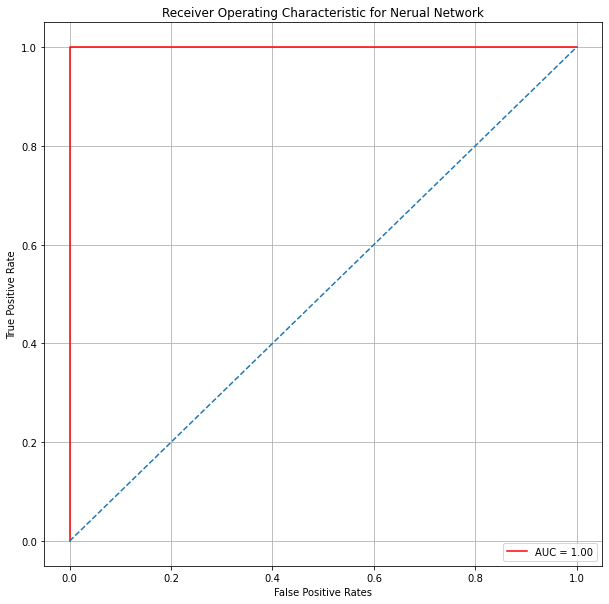

In [4]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_prob_nn_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for Nerual Network')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rates')
plt.savefig('nnroc.png')


print('\nNerual Network AUCROC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

